In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from dataset_clevr_ryan import *
import numpy as np

/viscam/projects/ns-diffusion/xingjian/miniconda3/envs/diffusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [169]:
bbox = gen_rand_bbox()
# print(bbox)
# print(bbox.normalized_output())
print(bbox.normalized_output(force_int=True, normalized_range=(0, 128)))

[18, 29, 101, 72]


In [2]:
dataset2 = RelationalDataset2O()

Loading images from image_path


25


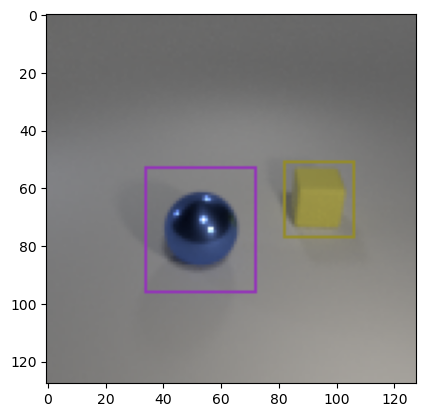

In [23]:

import matplotlib.pyplot as plt
from numpy.random import randint as rand
# show 20 images at the same time
for _ in range (1):
    rand_id = np.random.randint(0, len(dataset2)) % 100
    print(f"{rand_id}")
    clean_image, objects, relations, bboxes, generated_prompt, raw_image, raw_image_tensor, relations_ids = dataset2[rand_id]

    for bbox_data in bboxes:
        bbox = BoundingBox(bbox_data)
        raw_image = bbox.draw(raw_image)

    plt.imshow(raw_image)
    plt.show()


In [5]:
# dataset2 = RelationalDataset2O()
dataset3 = RelationalDataset3O()



AssertionError: shape_idx should be less than 4, but got 4

before: tensor([[0, 1, 1, 0, 1, 1, 7, 1, 0],
        [0, 1, 1, 0, 1, 1, 7, 1, 2],
        [1, 1, 7, 1, 0, 1, 1, 0, 1],
        [1, 1, 7, 1, 0, 1, 1, 0, 3]]) tensor([[0, 1],
        [0, 1],
        [1, 0],
        [1, 0]])


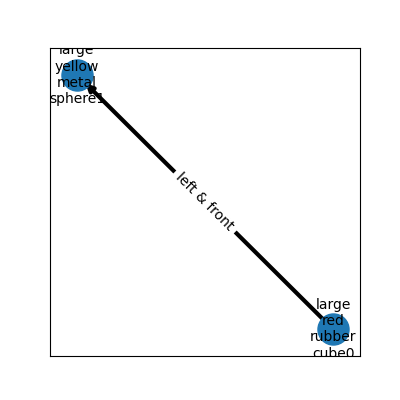

In [ ]:
rand_id = 0
clean_image, objects, relations, bboxes, generated_prompt, raw_image, raw_image_tensor, relations_ids = dataset3[rand_id]
draw_scene_graph(objects, relations, relations_ids)

In [4]:
for i in range(100):
    obj = dataset2.objects[i][0]
    print(obj.tensorize())

tensor([3, 0, 1, 1])
tensor([1, 1, 2, 0])
tensor([4, 1, 1, 1])
tensor([0, 0, 2, 1])
tensor([2, 0, 2, 0])
tensor([1, 0, 0, 0])
tensor([7, 0, 0, 1])
tensor([3, 1, 1, 1])
tensor([7, 0, 0, 1])
tensor([7, 0, 0, 1])
tensor([6, 1, 1, 1])
tensor([4, 1, 1, 0])
tensor([7, 1, 1, 0])
tensor([1, 1, 0, 1])
tensor([3, 1, 1, 1])
tensor([0, 0, 2, 0])
tensor([7, 0, 0, 1])
tensor([6, 1, 0, 0])
tensor([1, 1, 1, 1])
tensor([1, 0, 1, 1])
tensor([2, 0, 1, 1])
tensor([4, 0, 0, 1])
tensor([3, 1, 2, 0])
tensor([0, 1, 0, 1])
tensor([1, 0, 2, 1])
tensor([1, 0, 0, 0])
tensor([2, 1, 0, 0])
tensor([1, 0, 1, 1])
tensor([2, 1, 0, 1])
tensor([0, 0, 1, 1])
tensor([3, 1, 0, 1])
tensor([3, 1, 2, 1])
tensor([6, 0, 0, 1])
tensor([7, 1, 1, 1])
tensor([5, 0, 0, 1])
tensor([7, 0, 0, 1])
tensor([0, 1, 0, 0])
tensor([7, 1, 1, 1])
tensor([3, 0, 2, 1])
tensor([4, 0, 2, 0])
tensor([5, 0, 1, 1])
tensor([2, 1, 1, 1])
tensor([0, 1, 2, 0])
tensor([6, 1, 0, 1])
tensor([0, 1, 1, 1])
tensor([5, 1, 2, 1])
tensor([4, 1, 0, 1])
tensor([7, 0,

In [7]:
image0 = dataset2.annotated_images[rand_id]
image1 = dataset2.images[rand_id]
relations = dataset2.relations[rand_id]
objects = dataset2.objects[rand_id]
prompt = dataset2.prompts[rand_id]
bboxes = dataset2.bboxes[rand_id]

[]
[tensor([4, 0, 1, 1])]

[tensor([-0.4766, -0.0078,  0.2734,  0.2891])]


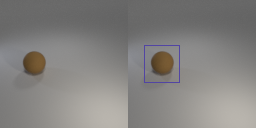

In [6]:
from utils import combine_images
image = combine_images(image1, image0)
print([rel.tensorize() for rel in relations])
print([obj.tensorize() for obj in objects])
print(prompt)
print([bbox.tensorize() for bbox in bboxes])
image

In [10]:
import numpy as np
data = np.load('/viscam/projects/ns-diffusion/dataset/clevr_rel_1obj_imgs/1.npz')